# Meteorite Analysis

This project is a data analysis on a public dataset provided by NASA about meteorites.

To understand this project, one must first understand what exactly are meteorites. A **meteorite** is a rock
originating from space after landing on a planet's surface. They start off as **meteoroids**, pieces broken of from an asteroid, comet
or a planet's surface, floating around in the vacuum of space. From there two outcomes happen once a meteoroid enters Earth's atmosphere by gravity.
Either it will vaporize into a streak of light at terminal velocity, or it will survive the trip and crash land on a surface, leaving a crater
and potentially cause destruction around the crash site should its mass be significantly large.

The public dataset used for this data analysis comes from NASA's Open Data Portal titled "Meteorite Landings". This dataset was provided by the Meteoritical Society.

We start off the dataset by creating to separate DataFrames: Fallen Meteorites and Found Meteorites. **Fallen Meteorites** are meteorites that have been observed falling from outer space. **Found Meteorites** are meteorites that have been discovered through intentional or unintentional excavations.

The original schema of this dataset is as follows:
1. Name of the Meteorite
2. Id of the Meteorite
3. Validity of Meteorite in terms of Classification (Valid or Relict)
4. Specific Meteorite Classification based on its composition and/or origin.
5. Mass of the Meteorite measured in grams
6. Status of Fallen or Found
7. Year which the Meteorite was observed.
8. Latitude location of the Meteorite.
9. Longitude location of the Meteorite.
10. GeoLocation of the Meteorite in a 2-tuple.

In [8]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

%matplotlib inline

df = pd.read_csv('Meteorite_Landings.csv')

#Grab data from meteorites fallen to Earth
fallen = df[df['fall'] == 'Fell']

#Grab data from meteorites found on Earth
found = df[df['fall'] == 'Found']
fallen

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
1106,Zhuanghe,30408,Valid,H5,2900.0,Fell,1976.0,39.66667,122.98333,"(39.66667, 122.98333)"
1107,Zmenj,30411,Valid,Howardite,246.0,Fell,1858.0,51.83333,26.83333,"(51.83333, 26.83333)"
1108,Zomba,30412,Valid,L6,7500.0,Fell,1899.0,-15.18333,35.28333,"(-15.18333, 35.28333)"
1109,Zsadany,30413,Valid,H5,552.0,Fell,1875.0,46.93333,21.50000,"(46.93333, 21.5)"


In [9]:
found

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
37,Northwest Africa 5815,50693,Valid,L5,256.8,Found,NaN,0.00000,0.00000,"(0.0, 0.0)"
520,Cumulus Hills 04075,32531,Valid,Pallasite,9.6,Found,2003.0,NaN,NaN,NaN
757,Dominion Range 03239,32591,Valid,L6,69.5,Found,2002.0,NaN,NaN,NaN
804,Dominion Range 03240,32592,Valid,LL5,290.9,Found,2002.0,NaN,NaN,NaN
1111,Abajo,4,Valid,H5,331.0,Found,1982.0,26.80000,-105.41667,"(26.8, -105.41667)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


## Data Cleaning

From here we start cleaning up both DataFrames, eliminating any rows with unavailable data in any column. We also eliminate the "GeoLocation" column because all meteorites have their separate latitude and longitude columns. Finally we eliminate all meteorites with coordinates that mark the Zero Point of the Equator and Greenwich Meridian.

In [10]:
# Clear out all rows with missing information
# Drop GeoLocation column due to redundancy
# Grab Meteorites NOT in the Zero Point of Equator and Greenwich Meridian
clean_fallen = fallen.dropna(how='any', axis=0)
clean_found = found.dropna(how='any', axis=0)
clean_fallen = clean_fallen.drop(columns='GeoLocation')
clean_found = clean_found.drop(columns='GeoLocation')
clean_fallen = clean_fallen[(clean_fallen['reclat'] != 0.0) & (clean_fallen['reclong'] != 0.0)]
clean_found = clean_found[(clean_found['reclat'] != 0.0) & (clean_found['reclong'] != 0.0)]

clean_fallen

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000
...,...,...,...,...,...,...,...,...,...
1106,Zhuanghe,30408,Valid,H5,2900.0,Fell,1976.0,39.66667,122.98333
1107,Zmenj,30411,Valid,Howardite,246.0,Fell,1858.0,51.83333,26.83333
1108,Zomba,30412,Valid,L6,7500.0,Fell,1899.0,-15.18333,35.28333
1109,Zsadany,30413,Valid,H5,552.0,Fell,1875.0,46.93333,21.50000


In [11]:
clean_found

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
1111,Abajo,4,Valid,H5,331.00,Found,1982.0,26.80000,-105.41667
1112,Abar al' Uj 001,51399,Valid,H3.8,194.34,Found,2008.0,22.72192,48.95937
1113,Abbott,5,Valid,H3-6,21100.00,Found,1951.0,36.30000,-104.28333
1114,Abernathy,7,Valid,L6,2914.00,Found,1941.0,33.85000,-101.80000
1115,Abo,8,Valid,H,1.20,Found,1840.0,60.43333,22.30000
...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.00,Found,1990.0,29.03700,17.01850
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.00,Found,1999.0,13.78333,8.96667
45713,Zlin,30410,Valid,H4,3.30,Found,1939.0,49.25000,17.66667
45714,Zubkovsky,31357,Valid,L6,2167.00,Found,2003.0,49.78917,41.50460


Next, we check for any meteorites marked as "Relict". A **relict meteorite** is a meteorite that cannot be classified into any of the 3 categories: Stone, Stony-Iron and Iron.

In [14]:
# Checking for "Invalid" meteorites known as Relict 
fallen_invalids = clean_fallen[(clean_fallen == 'Relict').any(axis=1)]
fallen_invalids #No invalids

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong


In [15]:
found_invalids = clean_found[(clean_found == 'Relict').any(axis=1)]
found_invalids 

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
6818,David Glacier 92308,6614,Relict,Chondrite-fusion crust,1.700,Found,1992.0,-75.31667,162.00000
12640,Gove,52859,Relict,Relict iron,0.000,Found,1979.0,-12.26333,136.83833
20679,Lewis Cliff 87241,13702,Relict,Chondrite-fusion crust,0.500,Found,1987.0,-84.34563,161.31058
23094,Meteorite Hills 001139,45809,Relict,Fusion crust,0.013,Found,2000.0,-79.68333,159.75000
31061,Österplana 048,56147,Relict,Relict OC,0.000,Found,2004.0,58.58333,13.43333
31062,Österplana 049,56148,Relict,Relict OC,0.000,Found,2012.0,58.58333,13.43333
31063,Österplana 050,56149,Relict,Relict OC,0.000,Found,2003.0,58.58333,13.43333
31064,Österplana 051,56150,Relict,Relict OC,0.000,Found,2006.0,58.58333,13.43333
31065,Österplana 052,56151,Relict,Relict OC,0.000,Found,2006.0,58.58333,13.43333
31066,Österplana 053,56152,Relict,Relict OC,0.000,Found,2002.0,58.58333,13.43333


In [16]:
# Remove the Relict meteorites
clean_fallen = clean_fallen[(clean_fallen.nametype != 'Relict')]
clean_fallen['year'] = clean_fallen['year'].astype(int)
clean_fallen = clean_fallen[(clean_fallen.year <= 2022)]
clean_fallen

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000
...,...,...,...,...,...,...,...,...,...
1106,Zhuanghe,30408,Valid,H5,2900.0,Fell,1976,39.66667,122.98333
1107,Zmenj,30411,Valid,Howardite,246.0,Fell,1858,51.83333,26.83333
1108,Zomba,30412,Valid,L6,7500.0,Fell,1899,-15.18333,35.28333
1109,Zsadany,30413,Valid,H5,552.0,Fell,1875,46.93333,21.50000


In [17]:
clean_found = clean_found[(clean_found.nametype != 'Relict')]
clean_found['year'] = clean_found['year'].astype(int)
clean_found = clean_found[(clean_found.year <= 2022)]
clean_found

C:\Users\LD\AppData\Local\Temp\ipykernel_8412\310399641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_found['year'] = clean_found['year'].astype(int)


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
1111,Abajo,4,Valid,H5,331.00,Found,1982,26.80000,-105.41667
1112,Abar al' Uj 001,51399,Valid,H3.8,194.34,Found,2008,22.72192,48.95937
1113,Abbott,5,Valid,H3-6,21100.00,Found,1951,36.30000,-104.28333
1114,Abernathy,7,Valid,L6,2914.00,Found,1941,33.85000,-101.80000
1115,Abo,8,Valid,H,1.20,Found,1840,60.43333,22.30000
...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.00,Found,1990,29.03700,17.01850
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.00,Found,1999,13.78333,8.96667
45713,Zlin,30410,Valid,H4,3.30,Found,1939,49.25000,17.66667
45714,Zubkovsky,31357,Valid,L6,2167.00,Found,2003,49.78917,41.50460


At this point, the DataFrames are declared as clean. Therefore we eliminate the "Fall" and "Nametype" columns after they served their purpose.

In [18]:
# No need for these columns anymore after cleaning up the data
clean_fallen = clean_fallen.drop(columns='nametype')
clean_found = clean_found.drop(columns='nametype')
clean_fallen = clean_fallen.drop(columns='fall')
clean_found = clean_found.drop(columns='fall')

## Initial Data Analysis

With the newly clean DataFrames, we start off with the analysis by starting off with the maximum and minimum meteorites in terms of mass.

From the fallen meteorites, the meteorite with the largest mass is *Sikhote-Alin*, an Iron meteorite that fell on the Sikhote-Alin Mountains in Siberia on February 12, 1947 at 10:38 local time. The mass of this meteorite clocked in at approximately 23,000 kg or 23 tons.

In [19]:
# Finding the maximum and minimum meteorites by mass in grams
maximum_from_fallen = clean_fallen[(clean_fallen == clean_fallen['mass (g)'].max()).any(axis=1)]
maximum_from_fallen

,name,id,recclass,mass (g),year,reclat,reclong
920,Sikhote-Alin,23593,"Iron, IIAB",23000000.0,1947,46.16,134.65333


c:\Users\LD\anaconda3\envs\meteorite\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


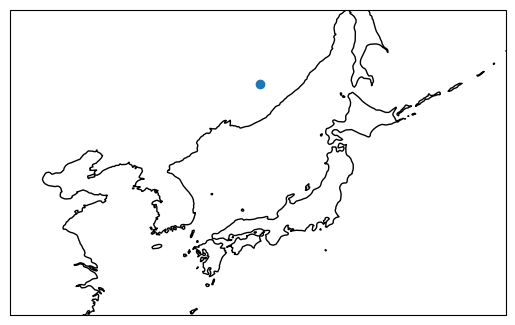

In [41]:
lon = maximum_from_fallen['reclong']
lat = maximum_from_fallen['reclat']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.set_extent([115, 154, 28, 52], ccrs.PlateCarree())
ax.scatter(lon, lat)
ax.coastlines()
plt.show()

The smallest mass of the fallen meteorites include meteorites Vilna and Yoshiki, clocking in at 0.1 grams. Vilna was observed falling at Vilna, Alberta, Canada on the date February 5, 1967 at an unspecified time. Yoshiki was observed falling at an unspecified location in Japan in the year 1928.

In [20]:
minimum_from_fallen = clean_fallen[(clean_fallen == clean_fallen['mass (g)'].min()).any(axis=1)]
minimum_from_fallen

,name,id,recclass,mass (g),year,reclat,reclong
1055,Vilna,24183,L5,0.1,1967,54.22500,-111.69167
1090,Yoshiki,30372,Stone-uncl,0.1,1928,34.16667,131.45000


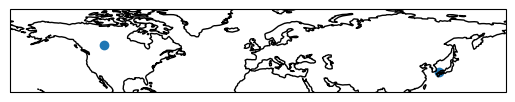

In [45]:
lon = minimum_from_fallen['reclong']
lat = minimum_from_fallen['reclat']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.set_extent([126, 233, 20, 80], ccrs.PlateCarree())
ax.scatter(lon, lat)
ax.coastlines()
plt.show()

From the found meteorites, the meteorite with the largest mass is *Hoba*, an Iron meteorite found by a farmer in 1920 at Grootfontein, Namibia. The mass of this meteorite clocked in at approximately 60,000 kg or 59 tons. This meteorite has been theorized to have fallen about 80,000 years ago.

In [21]:
maximum_from_found = clean_found[clean_found['mass (g)'] == clean_found['mass (g)'].max()]
maximum_from_found

,name,id,recclass,mass (g),year,reclat,reclong
16392,Hoba,11890,"Iron, IVB",60000000.0,1920,-19.58333,17.91667


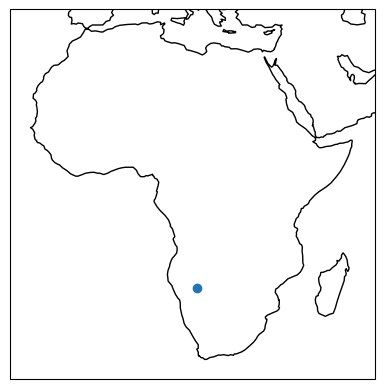

In [47]:
lon = maximum_from_found['reclong']
lat = maximum_from_found['reclat']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.set_extent([-22, 56, -39, 40], ccrs.PlateCarree())
ax.scatter(lon, lat)
ax.coastlines()
plt.show()

The meteorite found with the smallest mass of 0.01 g is Yamato 8333 in 1983 located at Antartica. At the moment of compiling this notebook, no external resources have been found regarding the method of discovery.

In [22]:
minimum_from_found = clean_found[clean_found['mass (g)'] == clean_found['mass (g)'].min()]
minimum_from_found

,name,id,recclass,mass (g),year,reclat,reclong
42703,Yamato 8333,29438,H5,0.01,1983,-71.5,35.66667


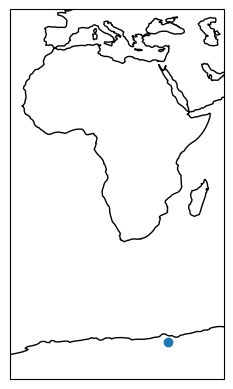

In [51]:
lon = minimum_from_found['reclong']
lat = minimum_from_found['reclat']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.set_extent([-22, 56, 50, -85], ccrs.PlateCarree())
ax.scatter(lon, lat)
ax.coastlines()
plt.show()

## General Classification and Pricing of Meteorites

Before moving on with the data analysis, we have decided to create two new columns: General Classification and Price. *General Classification* refers to the overall meteorite classification based on their composition and/or origin. With it, we can calculate the approximate price of a meteorite by mass based on its general classification. 

The three main Meteorite Classficiations are as follows:
1. Stone -> Meteorites mainly composed of stones be it from asteroids or from surfaces of a planet.
2. Stony-Iron -> Meteories composed with a combination of stone and iron.
3. Iron -> Meteories composed mainly of iron with some other metals to make alloys.

The Stone Classification is divided into two subclasses:
1. Chondrites -> Meteorites containing small, colorful, grain-like inclusions known as **chondrules**.
2. Achondrites -> Meteories lacking chondrules.

From the Achondrite subclass, therein lies the meteorites originating from the Earth's Moon and Mars. These meteorites are extremely rare and highly sought ought for scientific research purposes. As such, these particular meteorites are worth *$1,000 per gram*.

For the rest of the general classes, the pricing guide:
1. Stone -> *$20 per gram*
2. Stony-Iron -> *$12 per gram*
3. Iron -> *$5 per gram*
4. Miscellaneous -> *$0.5 per gram*

**NOTE**: This price guide does *NOT* reflect the *true* value of these meteorites. For the purposes of this data analysis, this price guide is served as an approximation and leaves out any other factors that might influence the price of a single meteorite such as context of find, jewelry factors, specific material types, etc.

With that disclaimer out of the way, we created two functions: the General Classifier and Price Tagger. The **General Classifier** is a function that reads the column of "reclass" for every meteorite in a DataFrame, and assigns a General Class using regular expressions to find the subclasses that belong to a main class. The function is used to create the attribute "genclass" for all meteorites in the DataFrame. The **Price Tagger** then reads the newly created "genclass" of every meteorite and creates a new attribute "price" to show the price of every meteorite.

The reason why two functions are used instead of combining them to one is because of speed concerns. The combination of General Classifier and Price Tagger took more time in calculating the general classifications and prices.

In [23]:
# Functions to calculate a price for each meteorites, fallen and found
# ----------------------------------------------------------------------
# Martian and Lunar are worth $1k/gram
# Stone and Chondrites are worth $20/gram
# Pallasites and Mesosiderites are worth $12/grams
# Iron is worth $5/gram
# Anything else is worth $0.5/gram
#-----------------------------------------------------------------------
# CLASSIFICATIONS
#
# Stone = [CI, CM, CO, CV, CK, CR, CR, CH, CB,
#               H, L, LL, EH, EL, R, K, Howardite, Eucrite, Diogenite,
#               Angrite, Aubrite, Ureilite, Brachinite]
#
# Valuables = [Lunar, Martian]
#
# Stony-Iron = [Pallasite, Mesosiderite]
# 
# Iron = [Iron]
#
# ----------------------------------------------------------------------- 
# Two columns to be used: recclass and mass (g)
#
# Such that if a meteorite['recclass'] falls in a certain class,
# Then calculate the price by its grams based on the classification

def meteorite_genclassifier(meteorite_recclass):

    if re.search(r'Lunar', meteorite_recclass, re.I):
        return 'MOON'

    elif re.search(r'Martian', meteorite_recclass, re.I):
        return 'MARS'

    elif re.search(r'O?C[0-9]?[A-Z]?', meteorite_recclass, re.I) \
        or re.search(r'\b[EHKLR][LH]?[0-9]?\b', meteorite_recclass, re.I) \
        or re.search(r'(?<!Pallas|Mesosider)ite', meteorite_recclass, re.I) \
        or re.search(r'Stone-ung', meteorite_recclass, re.I):
        return 'STONE'

    elif re.search(r'(Pallas|Mesosider)ite', meteorite_recclass, re.I):
        return 'STONY_IRON'

    elif re.search(r'Iron', meteorite_recclass, re.I):
        return 'IRON'

    else:
        return 'OTHER'

def price_tagger(meteorite_genclass):

    if meteorite_genclass['genclass'] in 'MOON' or meteorite_genclass['genclass'] in 'MARS':
        return meteorite_genclass['mass (g)'] * 1000.0

    elif meteorite_genclass['genclass'] in 'STONE':
        return meteorite_genclass['mass (g)'] * 20.0

    elif meteorite_genclass['genclass'] in 'STONY_IRON':
        return meteorite_genclass['mass (g)'] * 12.0

    elif meteorite_genclass['genclass'] in 'IRON':
        return meteorite_genclass['mass (g)'] * 5.0

    else:
        return meteorite_genclass['mass (g)'] * 0.5

## This function takes more time!!
# def price_tagger2(meteorite):
#     if re.search(r'Lunar', meteorite['recclass'], re.I) or re.search(r'Martian', meteorite['recclass'], re.I):
#         price = meteorite['mass (g)'] * 1000.0
#         return price

#     elif re.search(r'O?C[0-9]?[A-Z]?', meteorite['recclass'], re.I) \
#         or re.search(r'\b[EHKLR][LH]?[0-9]?\b', meteorite['recclass'], re.I) \
#         or re.search(r'(?<!Pallas|Mesosider)ite', meteorite['recclass'], re.I) \
#         or re.search(r'Stone-ung', meteorite['recclass'], re.I):
#         price = meteorite['mass (g)'] * 20.0
#         return price

#     elif re.search(r'(Pallas|Mesosider)ite', meteorite['recclass'], re.I):
#         price = meteorite['mass (g)'] * 12.0
#         return price

#     elif re.search(r'Iron', meteorite['recclass'], re.I):
#         price = meteorite['mass (g)'] * 5.0
#         return price

#     else:
#         price = meteorite['mass (g)'] * 0.5
#         return price

# TESTING THE FUNCTIONS HERE
# --------------------------------------------------------------------
# test = df.copy(deep=True)
# test['class'] = test['recclass'].apply(meteorite_genclassifier)
# test['price'] = test.apply(price_tagger, axis=1)
# #test['price'] = test.apply(price_tagger2, axis=1)
# test.head()
# --------------------------------------------------------------------

clean_fallen['genclass'] = clean_fallen['recclass'].apply(meteorite_genclassifier)
clean_fallen['price'] = clean_fallen.apply(price_tagger, axis=1)
clean_found['genclass'] = clean_found['recclass'].apply(meteorite_genclassifier)
clean_found['price'] = clean_found.apply(price_tagger, axis=1)

clean_fallen.head()

,name,id,recclass,mass (g),year,reclat,reclong,genclass,price
0,Aachen,1,L5,21.0,1880,50.77500,6.08333,STONE,420.0
1,Aarhus,2,H6,720.0,1951,56.18333,10.23333,STONE,14400.0
2,Abee,6,EH4,107000.0,1952,54.21667,-113.00000,STONE,2140000.0
3,Acapulco,10,Acapulcoite,1914.0,1976,16.88333,-99.90000,STONE,38280.0
4,Achiras,370,L6,780.0,1902,-33.16667,-64.95000,STONE,15600.0


In [24]:
clean_found.head()

,name,id,recclass,mass (g),year,reclat,reclong,genclass,price
1111,Abajo,4,H5,331.00,1982,26.80000,-105.41667,STONE,6620.0
1112,Abar al' Uj 001,51399,H3.8,194.34,2008,22.72192,48.95937,STONE,3886.8
1113,Abbott,5,H3-6,21100.00,1951,36.30000,-104.28333,STONE,422000.0
1114,Abernathy,7,L6,2914.00,1941,33.85000,-101.80000,STONE,58280.0
1115,Abo,8,H,1.20,1840,60.43333,22.30000,STONE,24.0


## New Statistics

With the new columns of "genclass" and "price", we created pie charts, numerical counts, histograms, and descriptive statistics.

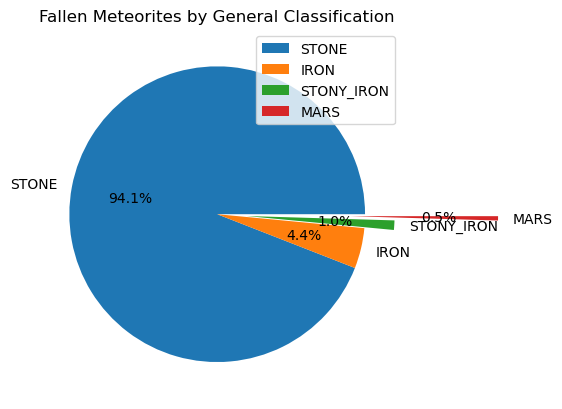

In [52]:
plt.title("Fallen Meteorites by General Classification")
plt.pie(clean_fallen['genclass'].value_counts(), labels=clean_fallen['genclass'].unique(), autopct='%.1f%%', explode=(0,0,0.2,0.9))
plt.legend()
plt.show()

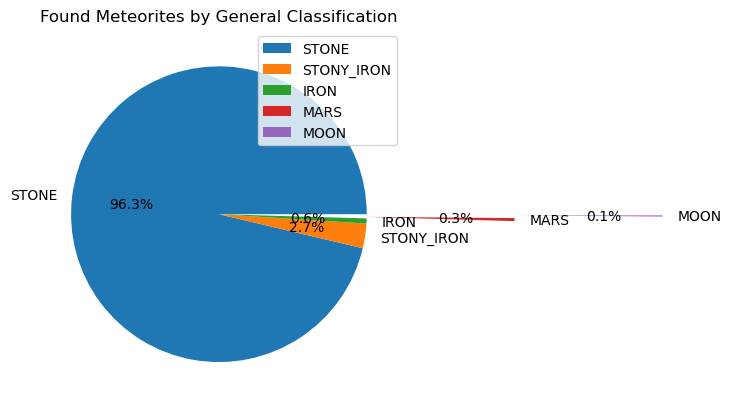

In [53]:
plt.title("Found Meteorites by General Classification")
plt.pie(clean_found['genclass'].value_counts(), labels=clean_found['genclass'].unique(), autopct='%.1f%%', explode=(0,0,0,1,2))
plt.legend()
plt.show()

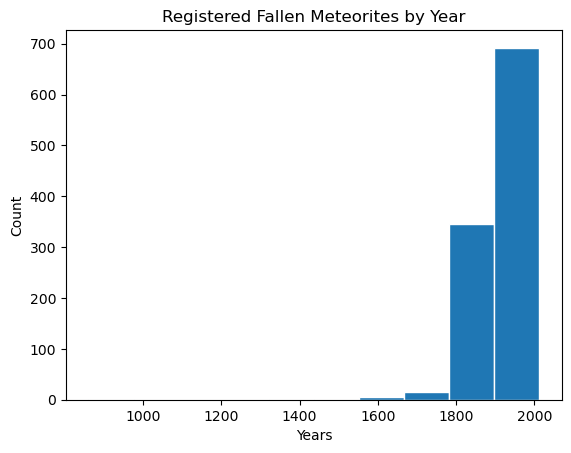

In [63]:
plt.title("Registered Fallen Meteorites by Year")
plt.xlabel("Years")
plt.ylabel("Count")
plt.hist(clean_fallen['year'], edgecolor='white', bins=10)
plt.show()

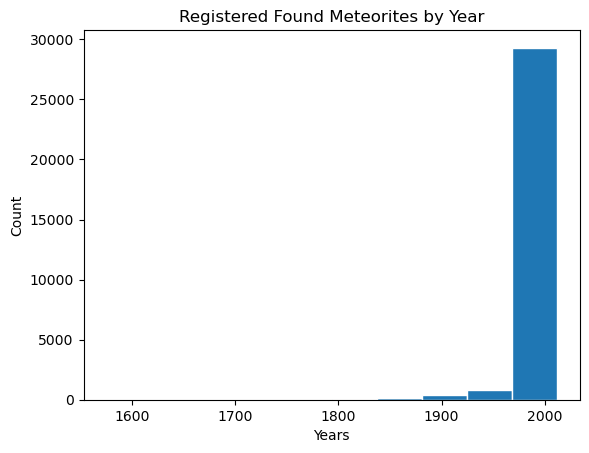

In [64]:
plt.title("Registered Found Meteorites by Year")
plt.xlabel("Years")
plt.ylabel("Count")
plt.hist(clean_found['year'], edgecolor='white', bins=10)
plt.show()

In [55]:
print("Numerical count of fallen meteorites based on General Class")
clean_fallen.groupby(['genclass']).size()

Numerical count of fallen meteorites based on General Class


genclass
IRON            47
MARS             5
STONE         1000
STONY_IRON      11
dtype: int64

In [57]:
print("Numerical count of found meteorites based on General Class")
clean_found.groupby(['genclass']).size()

Numerical count of found meteorites based on General Class


genclass
IRON            823
MARS             39
MOON            100
STONE         29488
STONY_IRON      171
dtype: int64

In [61]:
print("Descriptive statistics of fallen meteorites based on mass and price")
clean_fallen[['mass (g)','price']].describe()

Descriptive statistics of fallen meteorites based on mass and price


,mass (g),price
count,1.063000e+03,1.063000e+03
mean,4.758984e+04,7.976836e+05
std,7.210902e+05,9.002165e+06
min,1.000000e-01,2.000000e+00
25%,7.000000e+02,1.381000e+04
50%,2.900000e+03,5.512000e+04
75%,1.050000e+04,2.100000e+05
max,2.300000e+07,2.760000e+08


In [62]:
print("Descriptive statistics of found meteorites based on mass and price")
clean_found[['mass (g)','price']].describe()

Descriptive statistics of found meteorites based on mass and price


,mass (g),price
count,3.062100e+04,3.062100e+04
mean,1.768257e+04,2.292249e+05
std,6.883659e+05,8.294327e+06
min,1.000000e-02,2.000000e-01
25%,6.200000e+00,1.240000e+02
50%,2.720000e+01,5.468000e+02
75%,1.680000e+02,3.440000e+03
max,6.000000e+07,7.200000e+08


## Conclusion
We finish this data analysis by charting the world maps of registered fallen and found meteorites. Attempts at creating graphs and other statistics with the attribute of "price" and any other attribute leads to computer crashes. Other than that, the DataFrames `clean_fallen` and `clean_found` can be combined into one, and be exported into a new dataset. The new dataset can be used for any other projects such as a full-stack website.

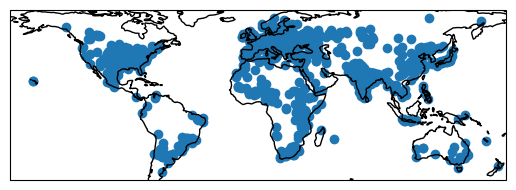

In [33]:
lon = clean_fallen['reclong']
lat = clean_fallen['reclat']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.scatter(lon, lat)
ax.coastlines()

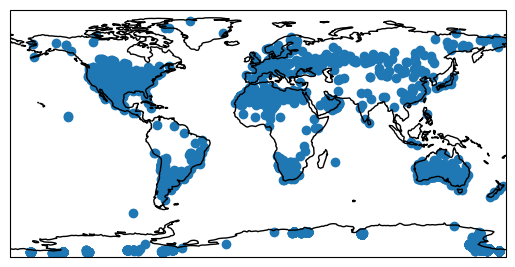

In [34]:
lon = clean_found['reclong']
lat = clean_found['reclat']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.scatter(lon, lat)
ax.coastlines()

## References